<a href="https://colab.research.google.com/github/nabilanewaz/ML/blob/main/Nabila_Newaz_210041216_CSE_4622_Linear_Regression_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red"> ** Optional : Make A COPY **

# <font color = "orange"> Today's Topics:
1. ``` class ``` in Python
2. Data Preprocessing
3. Linear Regression

  i.  Univariate

  ii. Multivariate



# <font color = "orange" > ```class``` in Python
* constructor ```__init__()```
* ```self```

  * every method takes ``` self ```
  * difference beetween ``` age ``` and ``` self.age ```

In [5]:
class myClass:
  def __init__(self):
     print("This is a constructor")

  def myFunction(self, y):
    print("This is a function")
    self.y = y
    print(y)
    print(self.y)

  def anotherFunction(self, y):
    #print(y)
    print(self.y)

obj = myClass()
obj.myFunction(10)
obj.anotherFunction(10)

This is a constructor
This is a function
10
10
10


#### <font color="lime"> TODO: creating ```class``` in Python

* Create a class for **Person**
* with attributes **name**, **age**
* constructor and method **printinfo()**

** Note:
* every method takes ``` self ```
* difference beetween ``` age ``` and ``` self.age ```

In [6]:
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def printinfo(self):
    print(self.name, self.age)

aboutme = Person("Nabila", 23)
aboutme.printinfo()

age = int(input())
print(age - aboutme.age)


Nabila 23
40
17


# <font color="orange"> Linear Regression from Scratch

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

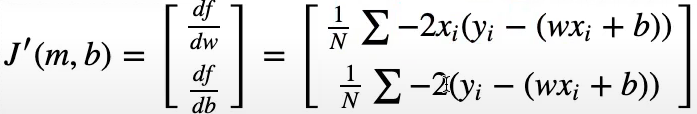

#### <font color="lime"> TODO: create a ```class LinearRegression```

* ```__init__()```:
  * args: takes **learning rate**, **number of iterations** as arguments; you can also assign default values to these arguments
  * declares two variables as **weights** and **bias** respectively with ```None``` value
  * to plot the cost/error later, declare a list.

* ```fit(```):
  * args: ***X***: data (sample x feature) matrix, ***y***: labels or values
  * from data ***X***, determine **no of samples** and **no of features** [hint: shape of X]
  * ininitalize **weights** and **bias**
  * for every iteration till the no of iteration:
    * predict with current **weights** and **bias**
    * [hints: np.dot(), np.sum(), np.mean(), transpose of X = X.T]
    * determine **cost** / **(Mean-Squared) Error** and append to the cost list
    * update the **weights** and **bias**

* ```predict()```:
  * args: ***X***: new data for which we want to predict
  * predict: [hint: same as prediction from ```fit()``` method]
  * returns: predicted value(s)

* ```plot_gradientDescent()```:
  * plots the cost (or, gradient descent) list: [hint:```plt.plot()```]


y = wx + b
*   y = prediction (dim: n*1)
*   x = (input) feature (dim: n*f)
*   w = weight (dim: f*1)
*   b = bias (scalar)
*   w, b -> learning parameters

Pipeline for any Machine Learning Algorithm:
1.   Guess/Predict with current parameters
2.   Find error
3.   Update parameters

In [13]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

In [17]:
class LinearRegression:
  ## todo
  def __init__(self, learning_rate = 0.1, no_of_iterations = 50):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.weights = None
    self.bias = None
    self.cost_list = []

  def fit(self, X, y):
    n_samples, f_features = X.shape
    self.weights = np.zeros(f_features)
    self.bias = 0

    for i in range(self.no_of_iterations):
      y_predicted = np.dot(X, self.weights) + self.bias
      cost = mse(y, y_predicted)
      self.cost_list.append(cost)
      dw = (1/n_samples)* np.dot(X.T, (y_predicted - y))
      db = (1/n_samples)* np.sum(y_predicted - y)
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

  def plot_gradientDescent(self):
    plt.plot(self.cost_list)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

In the Linear Regression class, we have four methods:
<ol>
<li> Constructor (learning rate, iterations) </li>
<li> fit (where the machine actually learns, used to actually learn from the data, fit(X_train, y_train)) </li>
<li> predict(After learnign, we want to predict for new data. The data herw will go as test) </li>
<li> plotting (No parameters, internally a cost list exists that will finally plot) </li>
</ol>

**self.weight = 1 why didn't we write it?**

**Ans**: We avoid hardcoding self.weight = 1 because we aim to create a generalized model that can handle any number of features (i.e., multivariate regression).
Instead of assigning a single weight (like 1), we initialize weights dynamically—usually as a vector—based on the number of input features. This makes the model scalable and adaptable to:

Univariate regression (1 feature),

Multivariate regression (multiple features).

This generalization ensures that the model works regardless of whether you have 1 feature or 100.

**The fit function**

X_training data and y_training are our arguments.
X -> for one feature and many samples, the matrix is mx1. (For n features, the matrix is mxn). The shape is requried to find out the number of samples and features. So the shape of the weight will be the number of features.

For every iteration:
1.   predict something
2.   error made -> cost, append to the list
3.   update for next iteration

dw, db

w = w - lrxdw
b = b - lrxdb

X.shape return a touple

X.shape[0], X,shape[1]



# <font color="orange"> Univariate Linear Regression

### Gathering Dataset

In [18]:
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 7)  # random_state == seed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

print("shapes: x:", X.shape, "\t\t y:", y.shape)
print("shapes: X_train:", X_train.shape, "\t y_train:" ,y_train.shape)
print("shapes: X_test:", X_test.shape, "\t y_test:" , y_test.shape)

shapes: x: (100, 1) 		 y: (100,)
shapes: X_train: (80, 1) 	 y_train: (80,)
shapes: X_test: (20, 1) 	 y_test: (20,)


The data will be generated using scikitlearn, randomly,
100 samples, 1 feature -> univariate implementation.
Noise and random state
We will have data x and y, from which we will split to training and test(4 set).

X_train, X_test contains data

Y_train, Y_test contains values

In [19]:
X[0:5]

array([[ 0.00206557],
       [ 0.6547057 ],
       [-1.4506787 ],
       [ 1.76616088],
       [ 0.27445992]])

In [20]:
y[0:5]

array([  7.74874748,  48.30195813, -99.86839046, 170.69731585,
        35.38423095])

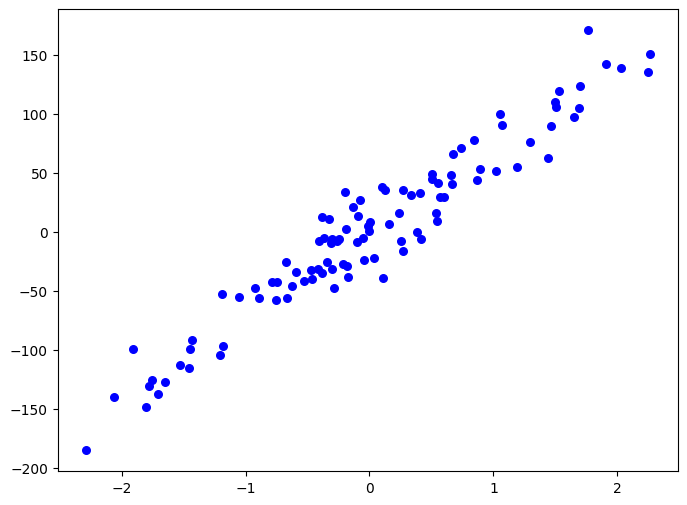

In [22]:
fig = plt.figure(figsize = (8,6))
plt.scatter(X[:, 0], y, color = 'b', marker = 'o', s = 30)
plt.show()

### Running Regression

In [32]:
# TODO: 1. create an object for linear regression class
# 2. run the fit() function with x train and y train
# 3. run the predict function with x test

linear = LinearRegression(learning_rate = 0.001, no_of_iterations = 10000)
linear.fit(X_train, y_train)
predicted = linear.predict(X_test)


In [39]:
# MEAN SQUARED ERROR  for the predicted values
MSE = mse(y_test, predicted)  # y_test are the true values
print(MSE)

387.4268402120403


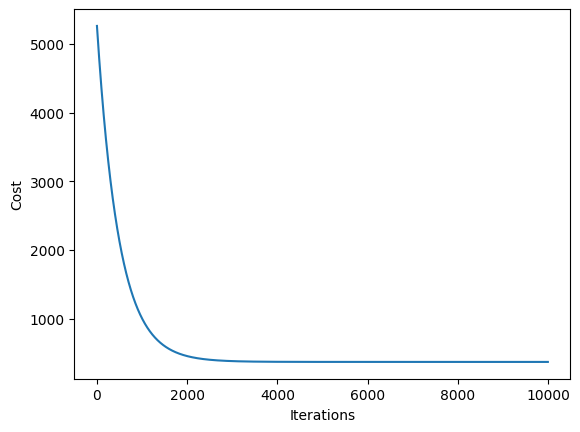

In [40]:
# TODO: plot the gradient descent
linear.plot_gradientDescent()

### visualization : see how the line fits

In [35]:
def draw_line (X_train, y_train, X_test, y_test, y_predicted):
    cmap = plt.get_cmap('viridis')
    fig = plt.figure(figsize = (8,6))
    m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s =10)
    m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s =10)
    plt.plot(X_test, y_predicted, color = 'black', linewidth = 2, label = 'prediction')
    plt.show()

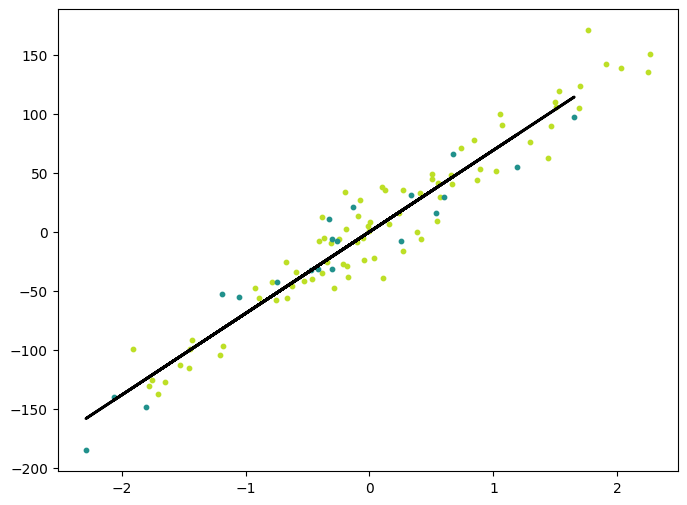

In [36]:
draw_line(X_train, y_train, X_test, y_test, predicted)

# <font color="orange"> Multivariate Linear Regression

# <font color = "orange"> Car Price Prediction

## Importing Libraries and Downloading Data

In [ ]:
import pandas as pd
import seaborn as sns
!gdown 1m_uJkaKZvX24wdyAjXFIxTUY3SIawaCF

## Reading and Understanding Data

In [ ]:
data = pd.read_csv("/content/CarPrice.csv")
data.head()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.columns

## Data Cleaning

### Splitting company name from CarName column
idea: car price depends on the Brand/ Company name

In [ ]:
carnames = data['CarName']
CompanyNames = []

for carname in carnames:
    brand = carname.split(" ")[0]
    CompanyNames.append(brand)

data.drop(['CarName'], axis = 1, inplace = True)
data.insert(3, "CompanyName", CompanyNames)

data.head()

In [ ]:
data.CompanyName = data.CompanyName.str.lower()

In [ ]:
data.CompanyName.unique()

#### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [ ]:
def replace_name(a, b):
    data.CompanyName.replace(a, b, inplace = True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.CompanyName.unique()

#### Checking for duplicate entries

In [ ]:
data.loc[data.duplicated()]

## Visualizing the data

### Categorical Data

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = data.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=data.enginetype, y=data.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))

plt.show()

### Numerical Data

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(15,30))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)

Car-length and Car-width seems to have positive correlation with price.

In [ ]:
data.head()

## Dummy Variables
idea: converting categories to their own features.

i.e. there are 2 fueltypes - diesel and gas.

approach 1: embed diesel to 0 and gas to 1

approach 2: create 2 new vectors called 'diesel' and 'gas' and have 0/1 values for having/not having that fuel

In [ ]:
data.dtypes

In [ ]:
data.fueltype.unique()

In [ ]:
data['fueltype'].tail()

In [ ]:
# converting categories to their own features. i.e. there are 2 fueltypes - diesel and gas.
# approach 1: embed diesel to 0 and gas to 1
# approach 2: create 2 new vectors called 'diesel' and 'gas' and have 0/1 values for having/not having that fuel

temp = pd.get_dummies(data['fueltype'])
temp.head()

In [ ]:
def gen_dummies(column_name, df):
    temp = pd.get_dummies(df[column_name])
    df = pd.concat([df, temp], axis = 1)
    df.drop([column_name], axis = 1, inplace = True)
    return df

data = gen_dummies('fueltype', data)
data.head()

In [ ]:
data.columns

In [ ]:
data.diesel

In [ ]:
data.gas

## Train-Test Split

In [ ]:
data_train, data_test = train_test_split(data, train_size =0.8, test_size = 0.2, random_state = 7)

In [ ]:
data_train.head()

In [ ]:
## selecting only few features to learn from
faeture_columns = ['wheelbase', 'carlength', 'horsepower', 'diesel', 'gas']
X_train = data_train[faeture_columns].values
X_test = data_test[faeture_columns].values
y_train = data_train['price'].values
y_test = data_test['price'].values
data_train.shape

In [ ]:
X_train

## Training and Evaluation

In [ ]:
# TODO: 1. create an objest for linear regression class
# 2. run the fit() function with x train and y train
# 3. run the predict function with x test

In [ ]:
mse(predicted, y_test)

In [ ]:
# TODO: plot the gradient descent